# Data Pre-processing

## Notebook Summary

This notebook focuses on preparing a cleaned dataset for linear modelling techniques, such as linear regression and ridge regression. The notebook details pre-processing steps, including standardising or normalising features to meet the assumptions of linear models. A key component is feature engineering, which involves creating or transforming variables to better capture underlying patterns and improve model performance. The dataset will be structured to ensure optimal performance and interpretability, providing a robust foundation for accurate predictive modelling using techniques such as linear regression and ridge regression.

## Notebook Setup

In [455]:
# Imports
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## Data Loading & Understanding

In [456]:
# Creating DataFrame
clean_house_df = pd.read_csv("london_house_price_data_clean.csv")
# Viewing DataFrame
clean_house_df.head(5)

,fullAddress,postcode,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,...,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price
0,"Flat 35, Octavia House, Medway Street, London,...",SW1P 2TA,SW1P,51.495505,-0.132379,2.0,2.0,71.0,1.0,Leasehold,...,683000.0,759000.0,834000.0,MEDIUM,2025-01-10T11:04:57.114Z,49000.0,6.901408,2019-09-04,1995-01-03,249950
1,"24 Chester Court, Lomond Grove, London, SE5 7HS",SE5 7HS,SE5,51.478185,-0.092201,1.0,1.0,64.0,1.0,Leasehold,...,368000.0,388000.0,407000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,7.777778,2024-01-25,1995-01-03,32000
2,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,Freehold,...,1198000.0,1261000.0,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000
3,"17 Collins Street, London, SE3 0UG",SE3 0UG,SE3,51.466089,0.006967,1.0,2.0,97.0,1.0,Freehold,...,897000.0,944000.0,991000.0,HIGH,2024-10-07T13:26:59.894Z,119000.0,14.424242,2021-09-30,1995-01-03,128500
4,"14 Theodore Road, London, SE13 6HT",SE13 6HT,SE13,51.451327,-0.007569,1.0,3.0,135.0,2.0,Freehold,...,690000.0,726000.0,762000.0,HIGH,2024-10-07T13:26:59.894Z,71000.0,10.839695,2021-12-06,1995-01-03,75000


In [457]:
# Columns and data types
clean_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265911 entries, 0 to 265910
Data columns (total 25 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                265911 non-null  object 
 1   postcode                                   265911 non-null  object 
 2   outcode                                    265911 non-null  object 
 3   latitude                                   265911 non-null  float64
 4   longitude                                  265911 non-null  float64
 5   bathrooms                                  265911 non-null  float64
 6   bedrooms                                   265911 non-null  float64
 7   floorAreaSqM                               265911 non-null  float64
 8   livingRooms                                265911 non-null  float64
 9   tenure                                     265911 non-null  object 
 10  property

In [458]:
# Shape of the data
rows, cols = clean_house_df.shape
print(f"The data has {rows} rows and {cols} columns")

The data has 265911 rows and 25 columns


### Categorical columns

The data input for regression models must be strictly numerical, necessitating the transformation of categorical variables into a suitable numerical format. This ensures compatibility with the mathematical foundations of regression algorithms.

- 'fullAddress'
- 'postcode'
- 'outcode'
- 'tenure'
- 'propertyType'
- 'currentEnergyRating'
- 'saleEstimate_confidenceLevel' 

### Date columns

Dates are typically stored as strings or datetime objects, which are not directly interpretable by the model. Therefore date values should be promptly removed. 

- 'saleEstimate_ingestedAt' 
- 'saleEstimate_valueChange.saleDate' 
- 'history_date'    

### Leakage columns

These columns provide insights into the target variable, must be removed to maintain the integrity of the statistical models. This action prevents data leakage and overfitting, ensuring that the model generalizes effectively to unseen data.

- 'rentEstimate_lowerPrice'
- 'rentEstimate_currentPrice'
- 'rentEstimate_upperPrice'
- 'saleEstimate_lowerPrice' 
- 'saleEstimate_upperPrice' 
- 'saleEstimate_confidenceLevel'
- 'saleEstimate_valueChange.numericChange'
- 'saleEstimate_valueChange.percentageChange'
- 'history_price'

### Non-Linear columns

These features do not show a linear relationship with the target variable, must be removed to improve the performance of regression model, improving the coefficients of the models.

- 'longitude'
- 'latitude'

## Redundant Feature Removal

#### Date columns

In [459]:
# Dropping multiple date columns
clean_house_df = clean_house_df.drop(columns=['saleEstimate_ingestedAt', 'saleEstimate_valueChange.saleDate', 'history_date'])

#### fullAddress column

In [460]:
# Count the number of unique values in the 'fullAddress' column
print(f"The fullAddress column has {clean_house_df['fullAddress'].nunique()} unique values")

# Dropping column
clean_house_df = clean_house_df.drop('fullAddress', axis=1)


The fullAddress column has 82613 unique values


#### postcode column

In [461]:
# Count the number of unique values in the 'postcode' column
print(f"The postcode column has {clean_house_df['postcode'].nunique()} unique values")

# Dropping column
clean_house_df = clean_house_df.drop('postcode', axis=1)

The postcode column has 38578 unique values


#### outcode column

In [462]:
# Count the number of unique values in the 'outcode' column
print(f"The outcode column has {clean_house_df['outcode'].nunique()} unique values")

# Dropping column
clean_house_df = clean_house_df.drop('outcode', axis=1)

The outcode column has 167 unique values


#### Latitude and Longitude

In [463]:
# Dropping column
clean_house_df = clean_house_df.drop('longitude', axis=1)
# Dropping column
clean_house_df = clean_house_df.drop('latitude', axis=1)

#### Leakage columns

In [464]:
# Dropping leakage columns
clean_house_df = clean_house_df.drop(columns=['rentEstimate_lowerPrice', 'rentEstimate_currentPrice', 'rentEstimate_upperPrice','saleEstimate_lowerPrice', 'saleEstimate_upperPrice', 'saleEstimate_confidenceLevel', 'saleEstimate_valueChange.numericChange', 'saleEstimate_valueChange.percentageChange', 'history_price'])

## Feature Engineering

#### tenure column


In [465]:
# Count the number of unique values in the 'tenure' column
print(f"The tenure column has {clean_house_df['tenure'].nunique()} unique values")

# Unique values in the column
tenure_unique_values = clean_house_df['tenure'].unique()

# Displaying the unique values
print(tenure_unique_values)

The tenure column has 4 unique values
['Leasehold' 'Freehold' 'Feudal' 'Shared']


In [466]:
# Initialising OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  

# Fit and transform the data
tenure_encoded = encoder.fit_transform(clean_house_df[['tenure']])

# Converting the result to a DataFrame
tenure_encoded_df = pd.DataFrame(tenure_encoded, columns=encoder.get_feature_names_out(['tenure']))

# Concatenating the one-hot encoded columns with the original dataframe
clean_house_df = pd.concat([clean_house_df, tenure_encoded_df], axis=1)

# Drop the original column
clean_house_df = clean_house_df.drop('tenure', axis=1)

#### propertyType column

In [467]:
# Count the number of unique values in the 'propertyType' column
print(f"The propertyType column has {clean_house_df['propertyType'].nunique()} unique values")

# Unique values in the column
property_unique_values = clean_house_df['propertyType'].unique()

# Displaying the unique values
print(property_unique_values)

The propertyType column has 19 unique values
['Flat/Maisonette' 'End Terrace House' 'Mid Terrace House'
 'Terrace Property' 'Semi-Detached House' 'Converted Flat'
 'Purpose Built Flat' 'Detached House' 'Bungalow Property' 'Terraced'
 'Detached Bungalow' 'Mid Terrace Property' 'Semi-Detached Bungalow'
 'End Terrace Property' 'Terraced Bungalow' 'Mid Terrace Bungalow'
 'Semi-Detached Property' 'Detached Property' 'End Terrace Bungalow']


Process:
- The categories should be binned before one hot encoding
- Binned based on structural properties


In [468]:
bungalow_num = clean_house_df['propertyType'].value_counts().get('Bungalow Property', 0)
total_num = len(clean_house_df['propertyType'])

proportion_bungalow = (bungalow_num/total_num) * 100 

print(proportion_bungalow)

0.13500757772337363


Bungalow Property is a category that is a very small proportion of the whole propertyType column, so it can be removed without any significant changes in the data.

In [469]:
# Find indices of rows where the PropertyType is 'Bungalow Property'
indices_to_drop = clean_house_df[clean_house_df['propertyType'] == 'Bungalow Property'].index

# Drop these rows using the drop method
clean_house_df = clean_house_df.drop(indices_to_drop)

In [470]:
# Checking to see if 'Bugalow Property' has been successfully removed
clean_house_df['propertyType'].value_counts()

propertyType
Purpose Built Flat        75555
Mid Terrace House         51124
Flat/Maisonette           42611
Converted Flat            32327
Semi-Detached House       22580
Terrace Property          18241
End Terrace House         14925
Detached House             7114
Semi-Detached Bungalow      261
Detached Bungalow           196
Terraced                    192
End Terrace Property        126
Semi-Detached Property       76
Detached Property            63
Mid Terrace Bungalow         57
Terraced Bungalow            47
End Terrace Bungalow         37
Mid Terrace Property         20
Name: count, dtype: int64

In [471]:
# Function to categorize property types based on key substrings
def categorize_propertyType(propertyType):
    if 'Flat' in propertyType:
        return 'Flat'
    elif 'Semi-Detached' in propertyType:
        return 'Semi-Detached'
    elif 'Terrace' in propertyType or 'Terraced' in propertyType:
        return 'Terraced'
    elif 'Detached' in propertyType:
        return 'Detached'
    else:
        return 'Other'  # Catch-all for anything not matching above categories

In [472]:
# Apply the categorization function to the 'PropertyType' column
clean_house_df['propertyType'] = clean_house_df['propertyType'].apply(categorize_propertyType)

In [473]:
# Checking if Binning process is successful
clean_house_df.head(10)

,bathrooms,bedrooms,floorAreaSqM,livingRooms,propertyType,currentEnergyRating,saleEstimate_currentPrice,tenure_Feudal,tenure_Freehold,tenure_Leasehold,tenure_Shared
0,2.0,2.0,71.0,1.0,Flat,C,759000.0,0.0,0.0,1.0,0.0
1,1.0,1.0,64.0,1.0,Flat,D,388000.0,0.0,0.0,1.0,0.0
2,1.0,4.0,137.0,2.0,Terraced,D,1261000.0,0.0,1.0,0.0,0.0
3,1.0,2.0,97.0,1.0,Terraced,D,944000.0,0.0,1.0,0.0,0.0
4,1.0,3.0,135.0,2.0,Terraced,E,726000.0,0.0,1.0,0.0,0.0
5,1.0,4.0,117.0,2.0,Terraced,D,920000.0,0.0,1.0,0.0,0.0
6,1.0,4.0,137.0,2.0,Terraced,D,1267000.0,0.0,1.0,0.0,0.0
7,2.0,4.0,142.0,2.0,Semi-Detached,D,600000.0,0.0,1.0,0.0,0.0
8,2.0,4.0,142.0,2.0,Semi-Detached,D,589000.0,0.0,1.0,0.0,0.0
9,2.0,2.0,96.0,2.0,Flat,C,1706000.0,0.0,0.0,1.0,0.0


**propertyType against average price**

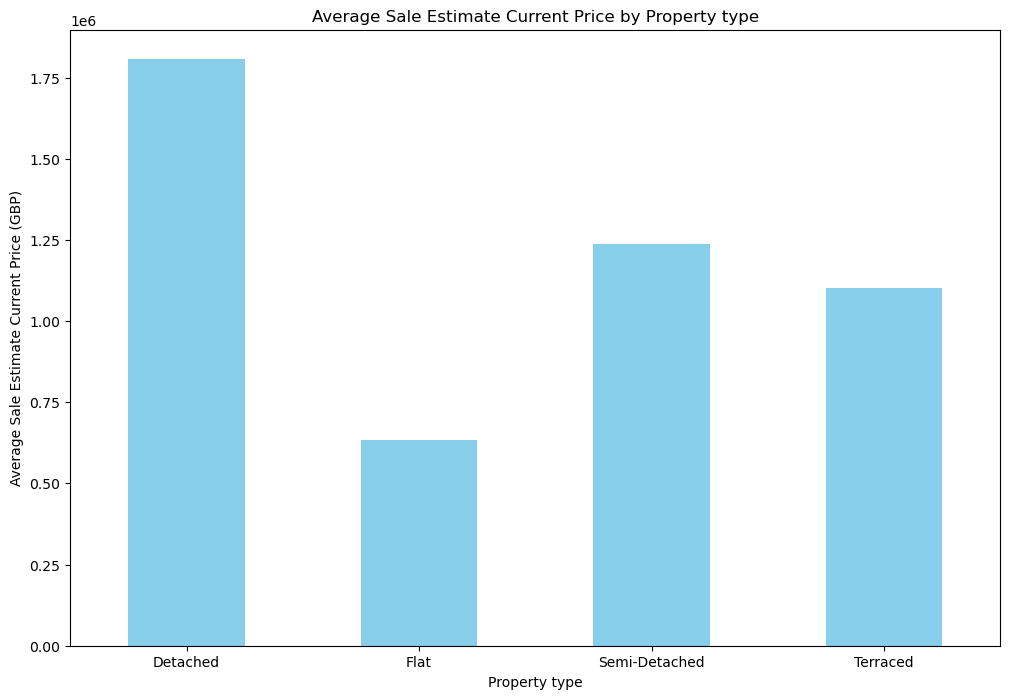

In [474]:
# Replotting property type against average price

# Calculating mean saleEstimate_currentPrice for each number of bathrooms
property_prices = clean_house_df.groupby('propertyType')['saleEstimate_currentPrice'].mean()

# Plotting bar chart
plt.figure(figsize=(12, 8)) 
property_prices.plot(kind='bar', color='skyblue')  
plt.title('Average Sale Estimate Current Price by Property type')
plt.xlabel('Property type')
plt.ylabel('Average Sale Estimate Current Price (GBP)')
plt.xticks(rotation = 0)


# Save the figure
# plt.savefig('Target_by_Tenure.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [475]:
# Initialising OneHotEncoder
property_encoder = OneHotEncoder(sparse_output=False, drop=None)  

# Fit and transform the data
property_encoded = property_encoder.fit_transform(clean_house_df[['propertyType']])

# Converting the result to a DataFrame
property_encoded_df = pd.DataFrame(property_encoded, columns=property_encoder.get_feature_names_out(['propertyType']))

# Concatenating the one-hot encoded columns with the original dataframe
clean_house_df = pd.concat([clean_house_df, property_encoded_df], axis=1)

# Drop the original column
clean_house_df = clean_house_df.drop('propertyType', axis=1)

#### currentEnergyRating column

In [476]:
# Count the number of unique values in the 'currentEnergyRating' column
print(f"The currentEnergyRating column has {clean_house_df['currentEnergyRating'].nunique()} unique values")

# Unique values in the column
energy_unique_values = clean_house_df['currentEnergyRating'].unique()

# Displaying the unique values
print(energy_unique_values)

The currentEnergyRating column has 7 unique values
['C' 'D' 'E' 'G' 'B' 'F' 'A' nan]


In [477]:
# Seeing if any null values have appeared
null_counts = clean_house_df.isna().sum()

# Print the result
print(null_counts)

# Remove null values which have arised
clean_house_df = clean_house_df.dropna()

bathrooms                     359
bedrooms                      359
floorAreaSqM                  359
livingRooms                   359
currentEnergyRating           359
saleEstimate_currentPrice     359
tenure_Feudal                 359
tenure_Freehold               359
tenure_Leasehold              359
tenure_Shared                 359
propertyType_Detached         359
propertyType_Flat             359
propertyType_Semi-Detached    359
propertyType_Terraced         359
dtype: int64


In [478]:
# Order of categories
categories = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]

# Initialising encoder
encoder = OrdinalEncoder(categories=categories)

# Fit and transform the data
energy_encoded = encoder.fit_transform(clean_house_df[['currentEnergyRating']])

# Adding the encoded values to the dataframe
clean_house_df['currentEnergyRating_encoded'] = energy_encoded

# Drop the original column
clean_house_df = clean_house_df.drop('currentEnergyRating', axis=1)

## Pre-processed Data Review

In [479]:
# Viewing DataFrame post-conversions
clean_house_df.head(5)

,bathrooms,bedrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice,tenure_Feudal,tenure_Freehold,tenure_Leasehold,tenure_Shared,propertyType_Detached,propertyType_Flat,propertyType_Semi-Detached,propertyType_Terraced,currentEnergyRating_encoded
0,2.0,2.0,71.0,1.0,759000.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
1,1.0,1.0,64.0,1.0,388000.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
2,1.0,4.0,137.0,2.0,1261000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,1.0,2.0,97.0,1.0,944000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
4,1.0,3.0,135.0,2.0,726000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0


In [480]:
# Rows and columns post encoding
clean_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265193 entries, 0 to 265551
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   bathrooms                    265193 non-null  float64
 1   bedrooms                     265193 non-null  float64
 2   floorAreaSqM                 265193 non-null  float64
 3   livingRooms                  265193 non-null  float64
 4   saleEstimate_currentPrice    265193 non-null  float64
 5   tenure_Feudal                265193 non-null  float64
 6   tenure_Freehold              265193 non-null  float64
 7   tenure_Leasehold             265193 non-null  float64
 8   tenure_Shared                265193 non-null  float64
 9   propertyType_Detached        265193 non-null  float64
 10  propertyType_Flat            265193 non-null  float64
 11  propertyType_Semi-Detached   265193 non-null  float64
 12  propertyType_Terraced        265193 non-null  float64
 13  curr

## Examining Pre-processed Data

#### Multicollinearity between features

##### Heatmap

c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


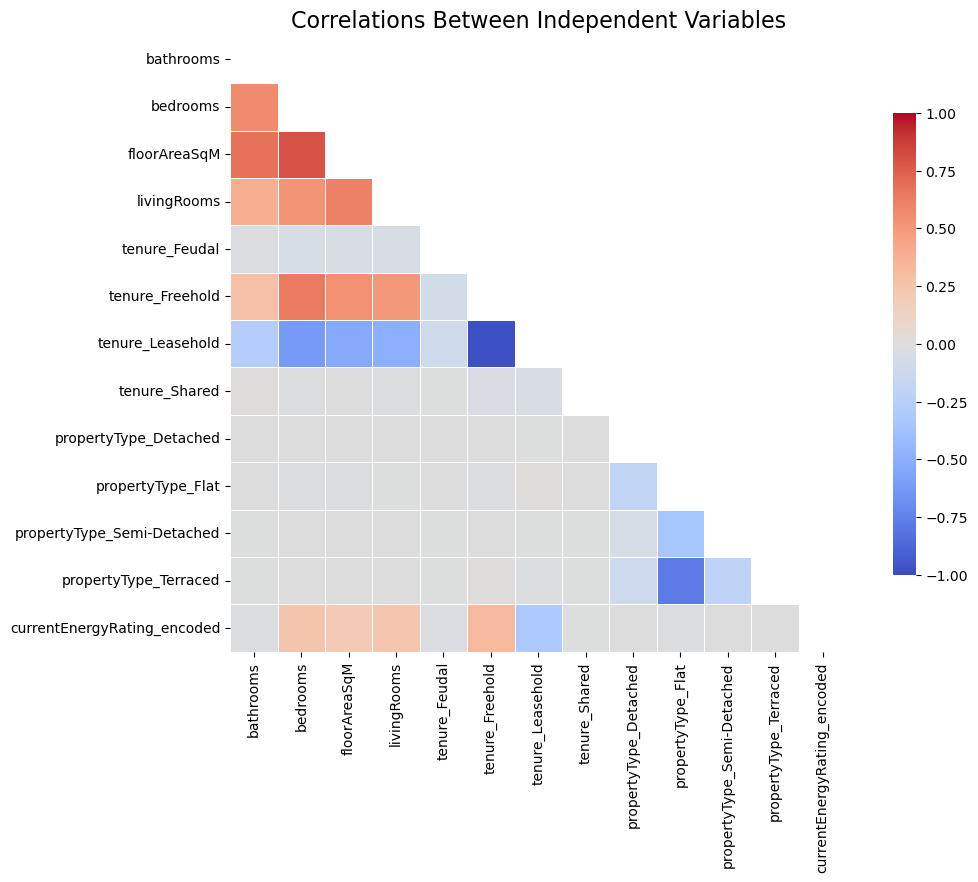

In [481]:
# Seaborn way

# Splitting the target and features 
X = clean_house_df.drop('saleEstimate_currentPrice', axis=1)
y = clean_house_df['saleEstimate_currentPrice']

# Correlation matrix
corr = X.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  

# Draw the heatmap
sns.heatmap(
    data=corr,
    mask=mask,
    annot=True,
    fmt=".2f",               
    vmin=-1, vmax=1,
    cmap="coolwarm",
    square=True,
    linewidths=0.5,          
    cbar_kws={"shrink": 0.75}  
)

plt.title("Correlations Between Independent Variables", fontsize=16)
plt.show()


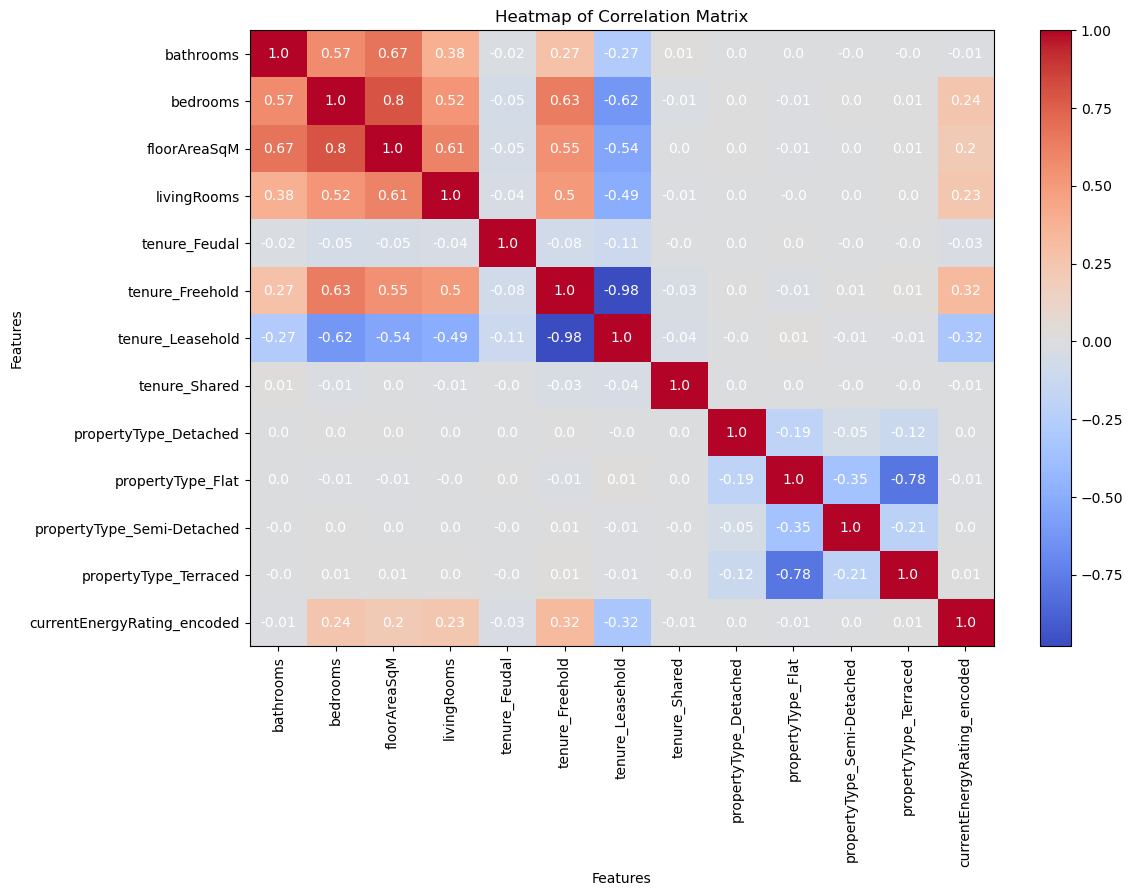

In [482]:
# matplotlib way

# Correlation matrix
correlation_matrix = X.corr()

# Create a heatmap from the correlation matrix
plt.figure(figsize=(12, 8))  
plt.imshow(correlation_matrix, aspect='auto', cmap='coolwarm', interpolation='none') 
plt.colorbar()  

# Title and labels
plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Setting ticks
tick_marks = np.arange(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=90)
plt.yticks(tick_marks, correlation_matrix.columns)

# Annotations in cells
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                       ha="center", va="center", color="w")

# Show plot
plt.show()


**Observations**
- Previous issue of bedrooms and bathrooms being highly correlated no longer persists after binning of property types
- tenure_Leasehold and tenure_Freehold are the two features which show the highest correlation between eachother
- Threshold of 0.7 or -0.7 should be set 
- Any features that exceed the threshold should be investigated and removed:
    - Freehold and Leasehold Tenure
    - Flat and Terraced Property type
    - Floor area square metres and bedrooms

**Insights**
- Tenure
    - EDA has revealed that Freehold has a higher average property price than Leasehold
    - Coefficients obtained from linear modelling shows that Leasehold has a more positive coefficient
- Property type
    - Terraced property types have higher average price than Flat property types
- Attributes
    - Floor area square metres is more important than bedrooms
    - EDA reveals that bedrooms columns hsows same trend as bathrooms column

##### Ammending Data

In [483]:
# Removal of one normal column and one dummy column
# Remove bedrooms column
# Remove tenure_Freehold
cols_to_remove = ['bedrooms', 'tenure_Freehold']
clean_house_df.drop(columns = cols_to_remove, inplace=True)

# Viewing
clean_house_df.head(10)

,bathrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice,tenure_Feudal,tenure_Leasehold,tenure_Shared,propertyType_Detached,propertyType_Flat,propertyType_Semi-Detached,propertyType_Terraced,currentEnergyRating_encoded
0,2.0,71.0,1.0,759000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
1,1.0,64.0,1.0,388000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
2,1.0,137.0,2.0,1261000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,1.0,97.0,1.0,944000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
4,1.0,135.0,2.0,726000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
5,1.0,117.0,2.0,920000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
6,1.0,137.0,2.0,1267000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
7,2.0,142.0,2.0,600000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
8,2.0,142.0,2.0,589000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
9,2.0,96.0,2.0,1706000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0


In [484]:
# Rows and columns
clean_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265193 entries, 0 to 265551
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   bathrooms                    265193 non-null  float64
 1   floorAreaSqM                 265193 non-null  float64
 2   livingRooms                  265193 non-null  float64
 3   saleEstimate_currentPrice    265193 non-null  float64
 4   tenure_Feudal                265193 non-null  float64
 5   tenure_Leasehold             265193 non-null  float64
 6   tenure_Shared                265193 non-null  float64
 7   propertyType_Detached        265193 non-null  float64
 8   propertyType_Flat            265193 non-null  float64
 9   propertyType_Semi-Detached   265193 non-null  float64
 10  propertyType_Terraced        265193 non-null  float64
 11  currentEnergyRating_encoded  265193 non-null  float64
dtypes: float64(12)
memory usage: 26.3 MB


##### Heatmap post column removal

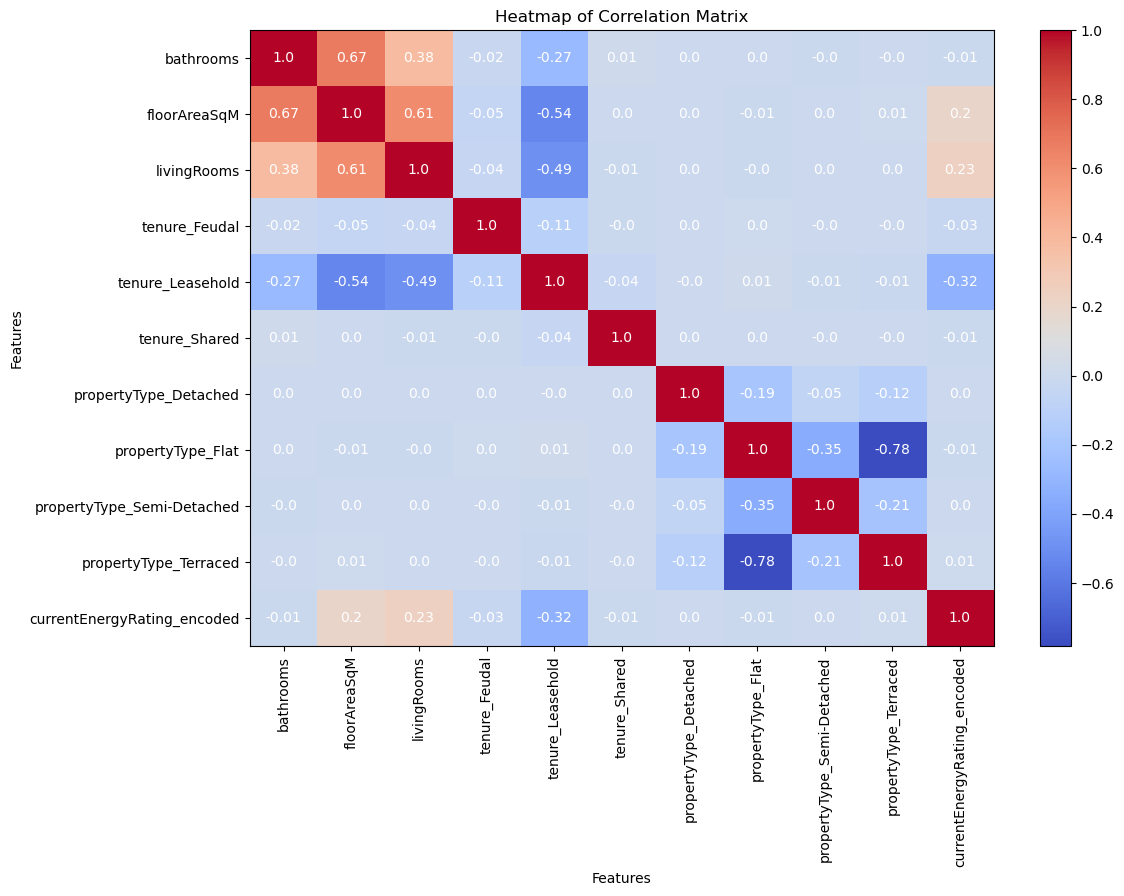

In [485]:
# New Heatmap post column removal

# Splitting the target and features 
new_X = clean_house_df.drop('saleEstimate_currentPrice', axis=1)
new_y = clean_house_df['saleEstimate_currentPrice']

# Correlation matrix
new_correlation_matrix = new_X.corr()

# Create a heatmap from the correlation matrix
plt.figure(figsize=(12, 8))  
plt.imshow(new_correlation_matrix, aspect='auto', cmap='coolwarm', interpolation='none') 
plt.colorbar()  

# Title and labels
plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Setting ticks
tick_marks = np.arange(len(new_correlation_matrix.columns))
plt.xticks(tick_marks, new_correlation_matrix.columns, rotation=90)
plt.yticks(tick_marks, new_correlation_matrix.columns)

# Annotations in cells
for i in range(len(new_correlation_matrix.columns)):
    for j in range(len(new_correlation_matrix.columns)):
        text = plt.text(j, i, round(new_correlation_matrix.iloc[i, j], 2),
                       ha="center", va="center", color="w")

# Show plot
plt.show()

Removal of one dummy column will not result in any significant loss of information about the dataset, hoping regularisation will take resolve the multi collinearity that exists between Terrace and Flat property types. 

## Saving the Pre-processed Data

In [486]:
# Saving the cleaned version of the dataset
clean_house_df.to_csv('london_house_price_data_pp.csv', index=False)